# Introducing Geomeppy

By adding the Geomeppy library into BESOS, we can now modify the building with some simple functions.
Some of the following examples are from [Geomeppy documentation](https://geomeppy.readthedocs.io/en/latest/index.html).

In [1]:
from besos import eppy_funcs as ef
from besos import IDF_class
from matplotlib import pyplot as plt

First we will get the building, and show a representation of the IDF. \
View_model() returns matplotlib.pyplot Figure and Axes objects.

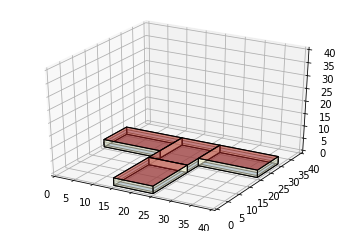

In [2]:
building = ef.get_building("t-shaped.exp.idf")
fig, ax = building.view_model()

You can then modify the pyplot objects and save it.

In [3]:
ax.set_zlim(0,10)
fig.savefig("building.png")

If the building is in relative coordinates you can convert it to world coordinates

In [4]:
building.relative_to_world_coords()

Now you can modify geomeppy.idf with geomeppy functions. First we’ll set window to wall ratio. By default, the set_wwr() will set WWR to 20%, you can also pass the spcific value by set_wwr(0.2) or set_wwr(wwr = 0.2)

In [5]:
#The result will be the same
building.set_wwr()
building.set_wwr(0.2)
building.set_wwr(wwr = 0.2) 

We can also set WWR for sepcific orientation. 

In [6]:
"""Set no windows on all external walls with azimuth of 90, and WWR of 20% on other walls"""
building.set_wwr(wwr_map={90: 0})

"""Set a WWR of 30% for all external walls with azimuth of 90, and no windows on other walls """
building.set_wwr(wwr=0, wwr_map={90: 0.3})

We can add overhangs

In [7]:
""" adds overhangs with a depth of 0.5m to all windows with tilt 90 degrees from surface"""
building.add_overhangs(depth = 0.5, tilt = 90)

"""adds overhang with a depth of 1.0m with tilt of 70 to east-facing windows"""
building.add_overhangs(depth = 1.0, tilt = 70, orientation = "east")

We can then remove windows and overhangs as well

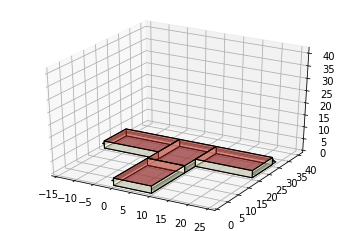

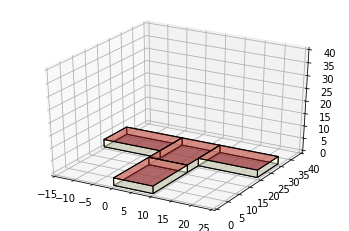

In [8]:
"""removing all windows and shading from south-facing walls"""
building.remove_shading(orientation = "south")
building.remove_windows("south")
fig, ax = building.view_model()
"""removing all windows and shading"""
building.remove_shading()
building.remove_windows()
fig, ax = building.view_model()

With newidfobject() function, we can add a new idfobject to the model. We will try to add a wall and use setcoords() to set the coordinates.

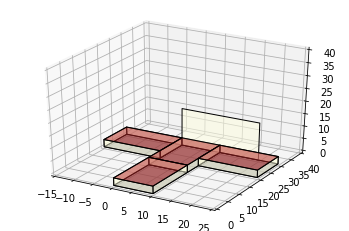

In [9]:
wall = building.newidfobject(
    'BUILDINGSURFACE:DETAILED',
    Name='AWall',
    Surface_Type = 'wall',
    )
wall.setcoords([(0,30,15),(0,30,0),(20,30,0),(20,30,15)])
fig, ax = building.view_model()

Add a huge box to the model.

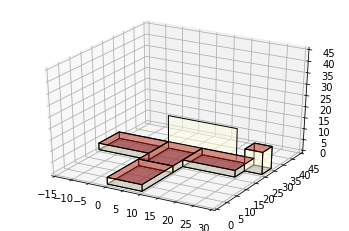

In [10]:
building.add_block(
        name='AHugeBox',
        coordinates=[(30,25),(30,30),(25,30),(25,25)],
        height=10)
fig, ax = building.view_model()

We can output a .obj file in order to view the model in other software or website, such as [3D viewer](https://3dviewer.net/).

In [11]:
building.to_obj('building.obj')